# Clase 3 - Semana 3
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Contaminantes

In [3]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/contam2022.csv'
contam = pd.read_csv(ruta, parse_dates = True, index_col=0)
contam.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [4]:
contam.columns = ['ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10']

In [5]:
contam.describe()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,27.238470,7.128311,15.446575,5.365868,49.600000
std,10.683100,5.100674,3.789316,1.750875,18.261962
min,9.625000,2.000000,7.458333,2.208333,15.125000
25%,18.666667,4.000000,12.500000,4.041667,35.583333
50%,25.708333,5.666667,15.250000,5.083333,48.000000
75%,33.916667,8.416667,17.875000,6.291667,61.250000
max,67.000000,34.416667,29.666667,12.000000,106.916667


## Coeficiente de asimetría de Fisher

El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra $\{x_1,x_2,...,x_n \}$,  la fórmula del coeficiente de asimetría de Fisher es:

\begin{equation*}
\gamma_1=\frac{\sum_{i=1}^n (x_i-\overline{x})^3}{n s^3}.
\end{equation*}



Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.


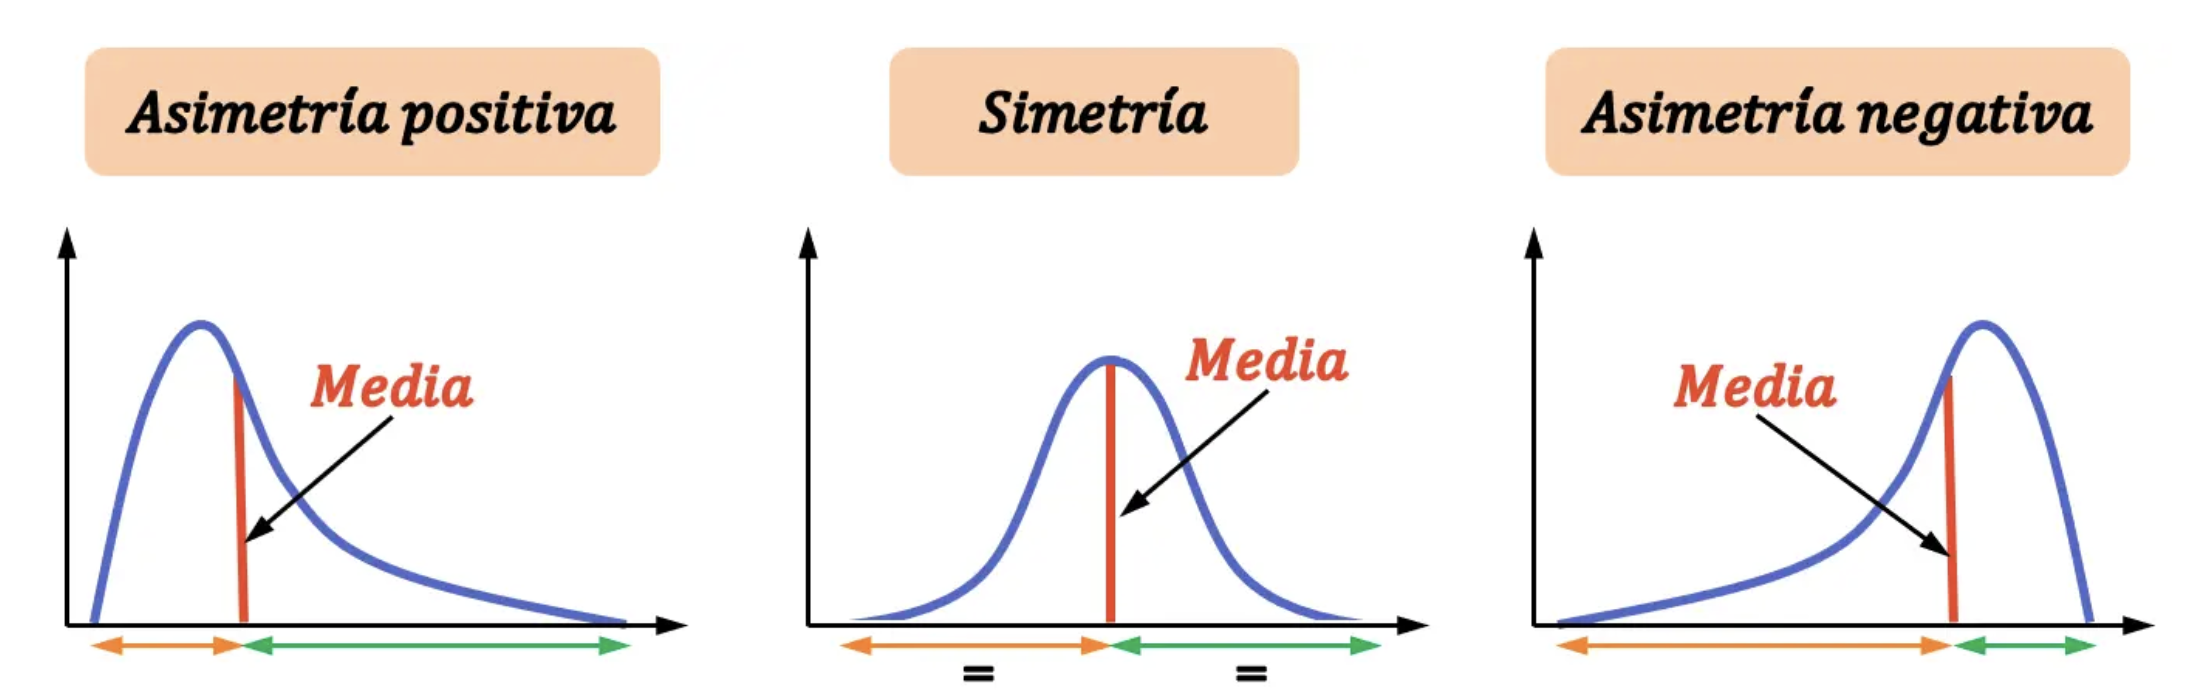

* Si $\gamma_1>0$, la distribución es asimétrica positiva.


* Si $\gamma_1<0$, la distribución es asimétrica negativa.

In [6]:
contam.skew()

ozono                0.848267
dioxido_azufre       2.038503
dioxido_nitrogeno    0.530644
monoxido_carbono     1.014769
PM10                 0.467447
dtype: float64

La **curtosis (Kurtosis)** define en qué  grado las colas de la distribución difieren de las colas de una distribución normal.  Dada una muestra $\{x_1,x_2,...,x_n \}$,  el coeficiente de curtosis  se define como: 

\begin{equation*}
\beta_2=\frac{\sum_{i=1}^n (x_i-\overline{x})^4}{n s^4}.
\end{equation*} 

Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.

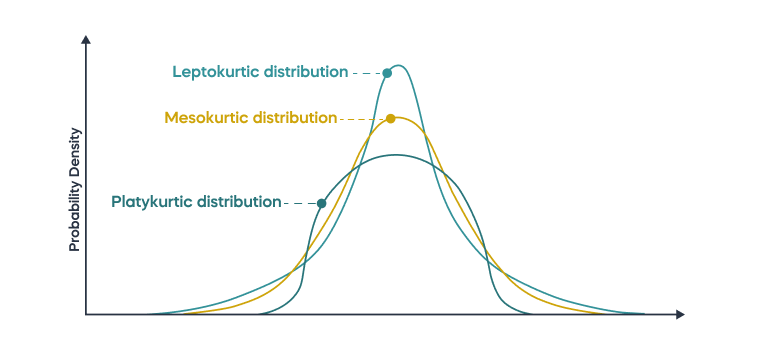

* Si $\beta_2>0$,  la distribución es leptocúrtica (distribución con colas más largas que la normal).


* Si $\beta_2=0$, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).


* Si $\beta_2<0$, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [7]:
contam.kurt()

ozono                0.608176
dioxido_azufre       4.881479
dioxido_nitrogeno    0.300435
monoxido_carbono     1.239080
PM10                -0.166532
dtype: float64

## Correlación

### El coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson $ r $ está dado por:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

donde:
- $ x_i, y_i $ son los valores de las variables $ X $ y $ Y $,
- $ \bar{x}, \bar{y} $ son las medias de $ X $ y $ Y $,
- $ n $ es el número de observaciones.

#### Interpretación de los valores de $ r $:

- $ r \approx 1 $: Correlación positiva fuerte. A medida que una variable aumenta, la otra también tiende a aumentar.
- $ r \approx -1 $: Correlación negativa fuerte. A medida que una variable aumenta, la otra tiende a disminuir.
- $ r \approx 0 $: No hay una relación lineal aparente entre las variables.

El valor de $ r $ se encuentra siempre en el rango $-1 \leq r \leq 1$.



### Supuestos del Coeficiente de Pearson

1. **Nivel de medición:**  
   Las variables deben ser de nivel **intervalar** o de **razón**. No es necesario que ambas tengan el mismo nivel, pero deben ser continuas y cuantitativas.

2. **Datos pareados:**  
   Cada observación debe contener un par de valores $(x_i, y_i)$. Las observaciones con datos faltantes en alguna de las dos variables deben excluirse del análisis.

3. **Normalidad bivariada:**  
   A diferencia de la normalidad marginal (en X o Y por separado), el coeficiente de Pearson requiere que la distribución conjunta de $ X $ y $ Y $ sea **normal bivariada**, es decir, que ambos conjuntos de datos sigan conjuntamente una distribución normal.



In [9]:
contam.corr(method='pearson') # Pearson

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
dioxido_azufre,0.101920,1.000000,0.310672,0.180158,0.456039
dioxido_nitrogeno,0.142250,0.310672,1.000000,0.844692,0.626440
monoxido_carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
PM10,0.481932,0.456039,0.626440,0.559163,1.000000


### Prueba de Normalidad de Shapiro–Wilk

La **prueba de Shapiro–Wilk** se utiliza para evaluar si un conjunto de datos sigue una **distribución normal**. Es considerada una de las pruebas más potentes para contrastar la normalidad, especialmente con muestras pequeñas o moderadas.

Esta prueba se basa en una hipótesis nula que afirma que la muestra proviene de una población normalmente distribuida. Como prueba de significación estadística, se establecen las siguientes hipótesis:

- **Hipótesis nula ($H_0$):** La muestra **proviene de una distribución normal**.  
  Aceptamos $H_0$ si el valor $p$ es **mayor que 0.05**.

- **Hipótesis alternativa ($H_1$):** La muestra **no proviene de una distribución normal**.  
  Aceptamos $H_1$ si el valor $p$ es **menor que 0.05**.

Un valor $p < 0.05$, **indica evidencia suficiente contra la normalidad** de los datos, sugiriendo que se rechace $H_0$.


In [10]:
from scipy.stats import shapiro

In [11]:
columnas = ['ozono', 'dioxido_azufre', 'dioxido_nitrogeno', 'monoxido_carbono', 'PM10']

for col in columnas:
    estadistico, p_value = shapiro(contam[col])
    print(f'{col}:  Estadístico = {estadistico:.3f}, p-value = {p_value:.10f}\n')

ozono:  Estadístico = 0.946, p-value = 0.0000000003

dioxido_azufre:  Estadístico = 0.791, p-value = 0.0000000000

dioxido_nitrogeno:  Estadístico = 0.981, p-value = 0.0001087600

monoxido_carbono:  Estadístico = 0.941, p-value = 0.0000000001

PM10:  Estadístico = 0.980, p-value = 0.0000548960



###  Correlación de Spearman ($\rho$)

El **coeficiente de correlación de Spearman** ($\rho$) es una **medida no paramétrica** que evalúa la **dependencia monotónica** entre dos variables aleatorias. A diferencia del coeficiente de Pearson, no requiere que los datos sigan una distribución normal, lo que lo hace especialmente útil en el análisis exploratorio de datos.

Esta medida se basa en los **rangos** de los valores en lugar de los valores originales, lo que le confiere varias propiedades importantes:



####  Fórmula del coeficiente de Spearman

Cuando no hay empates en los datos, la fórmula del coeficiente de Spearman es:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

donde:

- $d_i$ es la diferencia entre los rangos de cada par de observaciones.
- $n$ es el número de observaciones.



###  Propiedades

- **Transformación a rangos:**  
  Spearman convierte los datos a rangos antes de calcular la correlación. Esto permite detectar relaciones que no son necesariamente lineales.

- **Valor del coeficiente:**  
  El coeficiente $\rho$ varía entre $-1$ y $1$:  
  - $\rho = 1$: correlación positiva perfecta (a mayor $X$, mayor $Y$).  
  - $\rho = -1$: correlación negativa perfecta (a mayor $X$, menor $Y$).  
  - $\rho = 0$: no hay correlación monotónica.

- **Monotonía:**  
  Es ideal para identificar **relaciones monotónicas** (crecientes o decrecientes), incluso si no son lineales.

- **Robustez frente a atípicos:**  
  Al basarse en rangos, Spearman es menos sensible a datos atípicos (*outliers*).


| Historia | Rango | Geografía | Rango | d  | d² |
|----------|--------|------------|--------|----|-----|
| 35       | 3      | 30         | 5      | 2  | 4   |
| 23       | 5      | 33         | 3      | 2  | 4   |
| 47       | 1      | 45         | 2      | 1  | 1   |
| 17       | 6      | 23         | 6      | 0  | 0   |
| 10       | 7      | 8          | 8      | 1  | 1   |
| 43       | 2      | 49         | 1      | 1  | 1   |
| 9        | 8      | 12         | 7      | 1  | 1   |
| 6        | 9      | 4          | 9      | 0  | 0   |
| 28       | 4      | 31         | 4      | 0  | 0   |


In [12]:
contam.corr(method='spearman') 

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.197253,0.181516,0.051342,0.481537
dioxido_azufre,0.197253,1.000000,0.416420,0.296297,0.585443
dioxido_nitrogeno,0.181516,0.416420,1.000000,0.847467,0.643303
monoxido_carbono,0.051342,0.296297,0.847467,1.000000,0.571305
PM10,0.481537,0.585443,0.643303,0.571305,1.000000


In [13]:
corr_mat = contam.corr(method='spearman')

In [15]:
import seaborn as sns

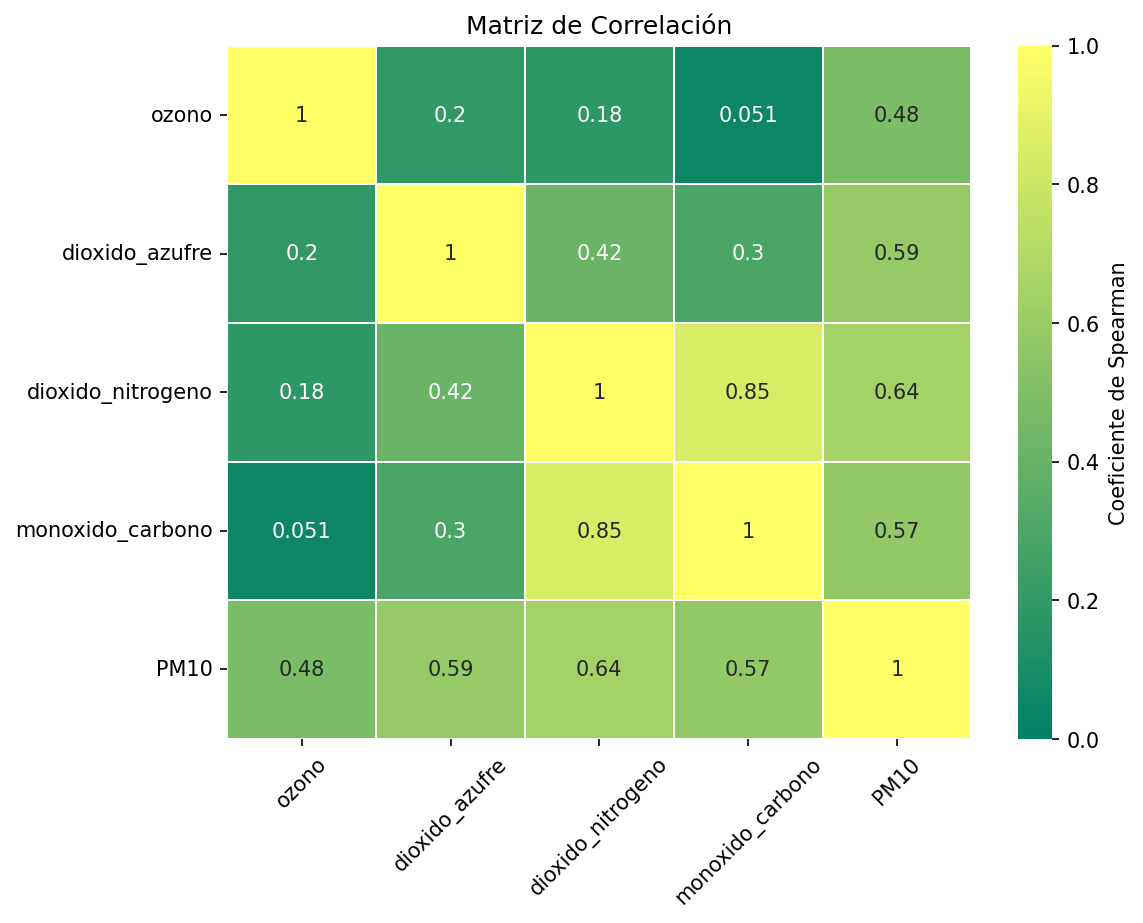

In [17]:
plt.figure(figsize=(8, 6),dpi=150)
sns.heatmap(corr_mat, annot=True,    
            cmap='summer',    
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = 0, vmax = 1, center = 0.5)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

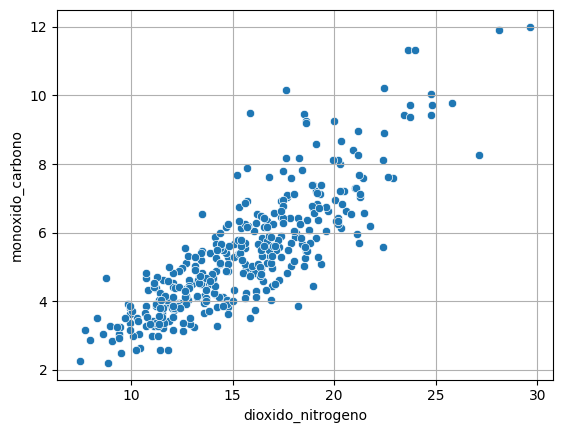

In [19]:
sns.scatterplot(data=contam, x='dioxido_nitrogeno', y='monoxido_carbono')
plt.grid(True)
plt.show()

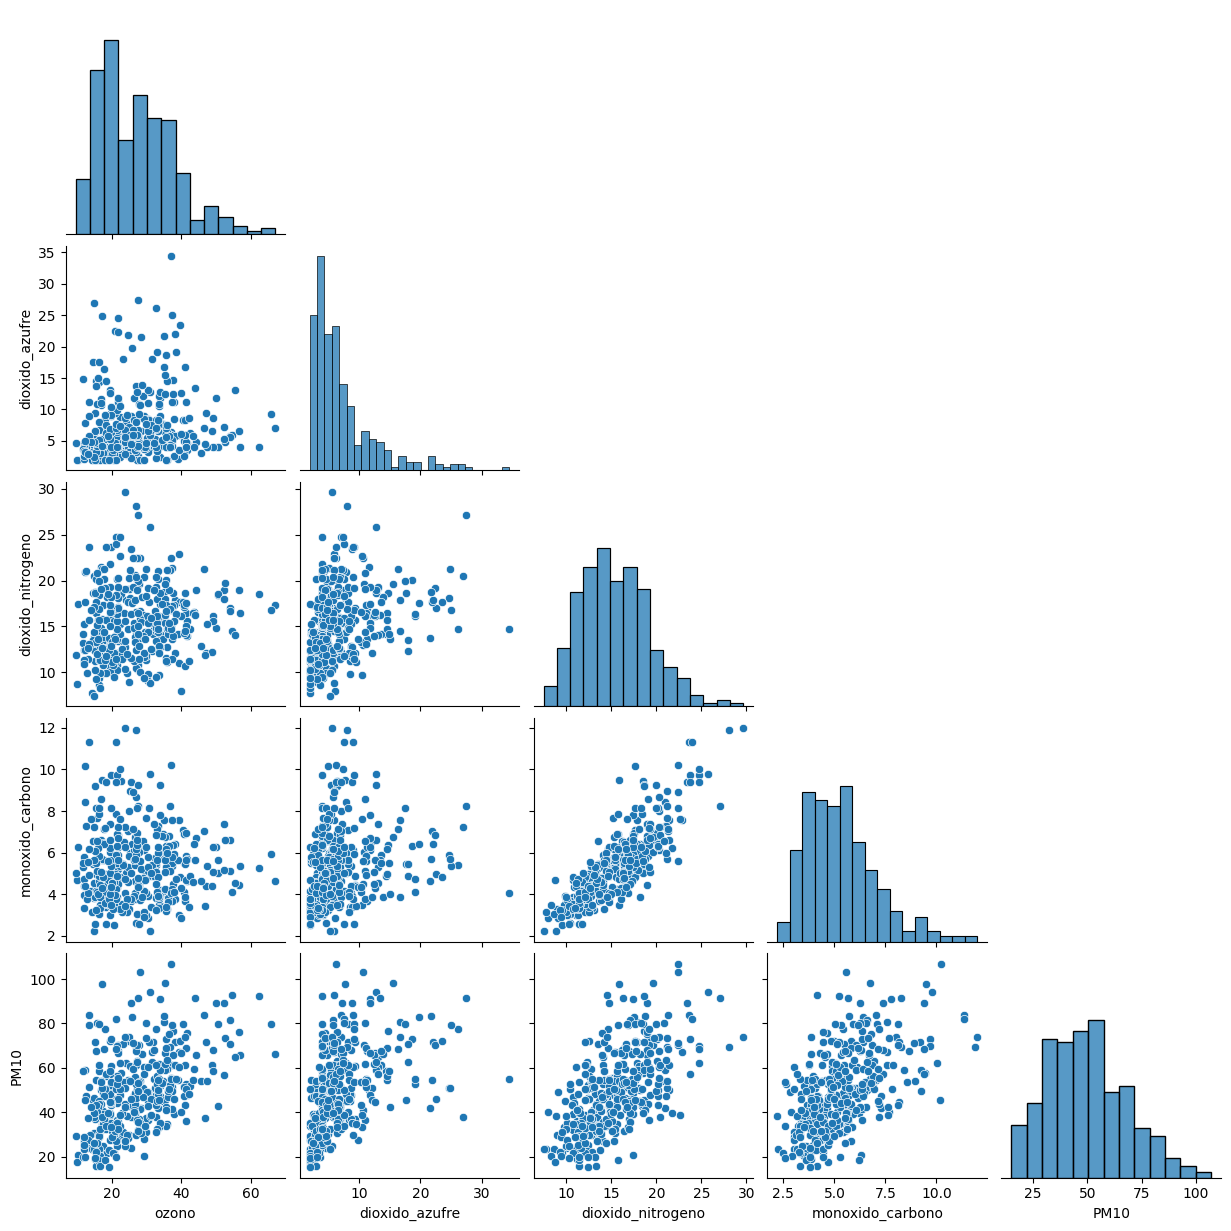

In [21]:
sns.pairplot(contam,corner=True)
plt.show()

https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
pip install pingouin 

In [24]:
import pingouin as pg

corr = pg.pairwise_corr(contam, method='spearman')

In [25]:
corr.round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,ozono,dioxido_azufre,spearman,two-sided,365,0.197,"[0.1, 0.29]",0.000,0.968
1,ozono,dioxido_nitrogeno,spearman,two-sided,365,0.182,"[0.08, 0.28]",0.000,0.938
2,ozono,monoxido_carbono,spearman,two-sided,365,0.051,"[-0.05, 0.15]",0.328,0.165
3,ozono,PM10,spearman,two-sided,365,0.482,"[0.4, 0.56]",0.000,1.000
4,dioxido_azufre,dioxido_nitrogeno,spearman,two-sided,365,0.416,"[0.33, 0.5]",0.000,1.000
5,dioxido_azufre,monoxido_carbono,spearman,two-sided,365,0.296,"[0.2, 0.39]",0.000,1.000
6,dioxido_azufre,PM10,spearman,two-sided,365,0.585,"[0.51, 0.65]",0.000,1.000
7,dioxido_nitrogeno,monoxido_carbono,spearman,two-sided,365,0.847,"[0.82, 0.87]",0.000,1.000
8,dioxido_nitrogeno,PM10,spearman,two-sided,365,0.643,"[0.58, 0.7]",0.000,1.000
9,monoxido_carbono,PM10,spearman,two-sided,365,0.571,"[0.5, 0.64]",0.000,1.000


In [26]:
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3)

,X,Y,r,p-unc
7,dioxido_nitrogeno,monoxido_carbono,0.847,0.000
8,dioxido_nitrogeno,PM10,0.643,0.000
6,dioxido_azufre,PM10,0.585,0.000
9,monoxido_carbono,PM10,0.571,0.000
3,ozono,PM10,0.482,0.000
4,dioxido_azufre,dioxido_nitrogeno,0.416,0.000
5,dioxido_azufre,monoxido_carbono,0.296,0.000
0,ozono,dioxido_azufre,0.197,0.000
1,ozono,dioxido_nitrogeno,0.182,0.000
2,ozono,monoxido_carbono,0.051,0.328


### ¿Existe una correlación entre las concentraciones de contaminantes y los factores meteorológicos?

In [27]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/redmet_2022.csv'
met = pd.read_csv(ruta, parse_dates = True, index_col=0)
met.head()

,RH,TMP,WDR,WSP
fecha,,,,
2022-01-01,44.808362,15.316545,174.009766,1.458594
2022-01-02,47.470383,14.371273,190.490494,2.208935
2022-01-03,61.131769,13.247547,171.861660,1.663043
2022-01-04,49.406427,14.986535,159.283096,1.285743
2022-01-05,42.854281,15.608000,156.118095,1.459048


La función **.concat()** en Pandas se utiliza para unir (concatenar) objetos como DataFrame o Series a lo largo de un eje específico (por filas o columnas). Es muy útil para combinar datos de manera flexible.

In [28]:
datos = pd.concat([contam,met],axis=1)

In [34]:
datos.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10,RH,TMP,WDR,WSP
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667,44.808362,15.316545,174.009766,1.458594
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000,47.470383,14.371273,190.490494,2.208935
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333,61.131769,13.247547,171.861660,1.663043
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333,49.406427,14.986535,159.283096,1.285743
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000,42.854281,15.608000,156.118095,1.459048


In [31]:
corr_mat = datos.corr(method='spearman') 

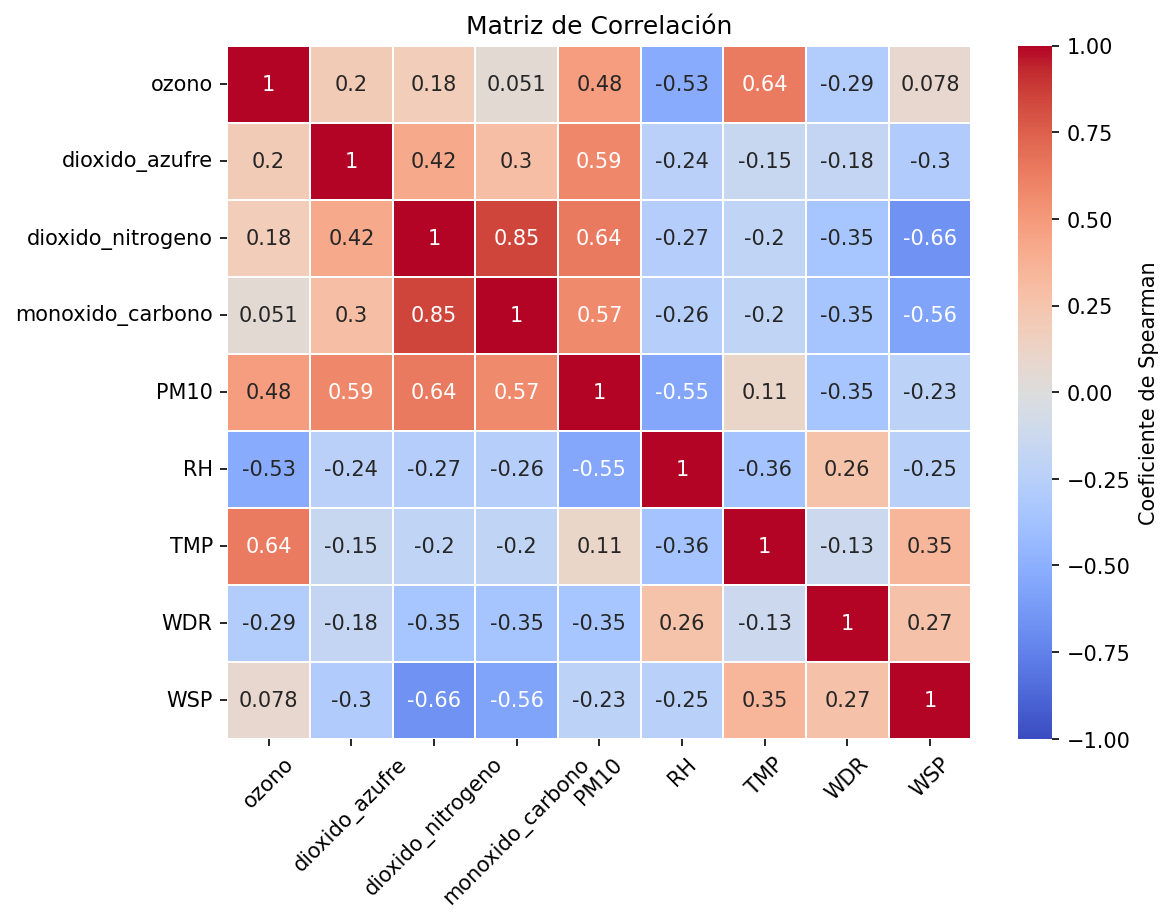

In [33]:
plt.figure(figsize=(8, 6),dpi=150)
sns.heatmap(corr_mat, annot=True,    
            cmap='coolwarm',    
            linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
           vmin = -1, vmax = 1, center = 0)
plt.title('Matriz de Correlación', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [35]:
corr = pg.pairwise_corr(datos, method='spearman')
corr.sort_values(by=['r'], ascending=False)[['X','Y','r']].round(3)

,X,Y,r
15,dioxido_nitrogeno,monoxido_carbono,0.847
16,dioxido_nitrogeno,PM10,0.643
5,ozono,TMP,0.635
10,dioxido_azufre,PM10,0.585
21,monoxido_carbono,PM10,0.571
3,ozono,PM10,0.482
8,dioxido_azufre,dioxido_nitrogeno,0.416
34,TMP,WSP,0.346
9,dioxido_azufre,monoxido_carbono,0.296
35,WDR,WSP,0.268


In [ ]:
#coolwarm